### Main file

In [1]:
import numpy as np 
from tools.srbm import *           # !!! Importing the experimental SRBM model !!!
from tools.functions import *
import matplotlib.pyplot as plt

date_str = str(datetime.datetime.now())[0:10]
date_time_str = str(datetime.datetime.now())[0:10]+"_"+str(datetime.datetime.now())[11:16]

/opt/homebrew/Caskroom/miniconda/base/envs/jupyt-tf/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
'''Load data that has been generated with "generate_data.py".
The file will be named according to the following pattern:  
data + number of classes + variation in prototype + variation in prototype replications + length stimuli + n datapoints
parameters in "common_parameters.py" need to be adjusted to fit the data. 
'''

length_stimuli = 100
num_classes = 5

# Loading the data
train_test_sequence_data = load_data(unique="finnegan_0.1_0.05_5_200_1000")

if length_stimuli != N_v or num_classes != n_classes:
    print("The data does not fit the parameters in common_parameters.py. Please adjust the parameters in common_parameters.py to fit the data.")

Data loaded from data/data_finnegan_0.1_0.05_5_200_1000.npy
The data does not fit the parameters in common_parameters.py. Please adjust the parameters in common_parameters.py to fit the data.


In [3]:
# Preparing the data
sequence_data = get_data(n_samples=n_samples, min_p = .00001, max_p = .98, binary = True, seed=0, 
                           load_from_drive=False, data=train_test_sequence_data, num_classes = range(n_classes))

In [4]:
# Create input current from data
Id = create_Id(N_v=N_v, N_c=N_c, n_c_unit=n_c_unit, beta=beta_parameter, n_samples=n_samples, data = sequence_data)

# Create the parameters for the SRBM
W, b_v, b_c, b_h = create_rbm_parameters(N_v = N_v, N_c = N_c, N_h = N_h)

In [5]:
# Run the model
loc = main(W, b_v, b_c, b_h, Id = Id, dorun = True, monitors = True, mnist_data=sequence_data, n_classes = 5)
locals().update(loc)

WARNING    Removing unsupported flag '-march=native' from compiler flags. [brian2.codegen.cpp_prefs]


Train accuracy: 0.22
Test accuracy: 0.205
Train accuracy: 0.225
Test accuracy: 0.205
Train accuracy: 0.22
Test accuracy: 0.205
Train accuracy: 0.33
Test accuracy: 0.405
Train accuracy: 0.33
Test accuracy: 0.385
Train accuracy: 0.22
Test accuracy: 0.205
Train accuracy: 0.26
Test accuracy: 0.305
Train accuracy: 0.325
Test accuracy: 0.39
Train accuracy: 0.675
Test accuracy: 0.675
Train accuracy: 0.6
Test accuracy: 0.635
Train accuracy: 0.375
Test accuracy: 0.445
Train accuracy: 0.37
Test accuracy: 0.45
Train accuracy: 0.345
Test accuracy: 0.39
Train accuracy: 0.59
Test accuracy: 0.62
Train accuracy: 0.595
Test accuracy: 0.64
Train accuracy: 0.595
Test accuracy: 0.64
Train accuracy: 0.595
Test accuracy: 0.64
Train accuracy: 0.595
Test accuracy: 0.64
Train accuracy: 0.68
Test accuracy: 0.7
Train accuracy: 0.715
Test accuracy: 0.72
Train accuracy: 0.895
Test accuracy: 0.895
Train accuracy: 0.975
Test accuracy: 0.995
Train accuracy: 0.98
Test accuracy: 0.99
Train accuracy: 0.98
Test accuracy:

In [13]:
neuron_group_rhidden.age

<neurongroup_1.age: array([-0.44489186, -0.98767356, -0.64799841,  0.15431465,  0.41846083,
        0.2820457 , -0.68582759,  0.18870474,  0.16886565, -0.81884549,
        0.96195841,  0.68660695,  0.55098092, -0.50716216,  0.02594993,
        0.27759846, -0.595623  , -0.31445996, -0.15906994,  0.35687211,
        0.11705589, -0.28633612, -0.62604975,  0.2224262 ,  0.11189966,
       -0.63724321, -0.46495744, -0.50574184,  0.87800842, -0.75479577,
        0.00271441,  0.23239666,  0.40190966,  0.72692358, -0.75823729,
       -0.15698512, -0.87454619, -0.19932388, -0.31803923,  0.16083216,
        0.74090952, -0.53710698,  0.5894596 ,  0.05673855,  0.16289076,
       -0.9517002 ,  0.63325581, -0.09067106, -0.80724548,  0.48490228])>

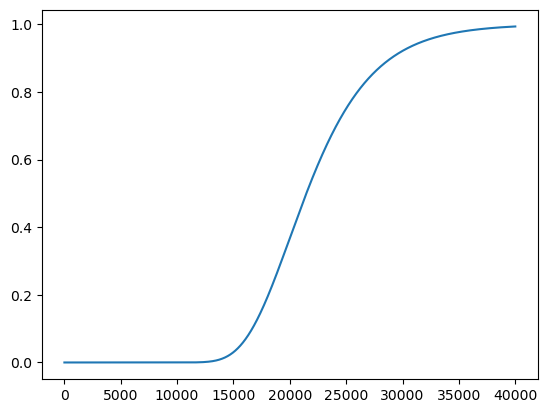

In [14]:
plot(growth_factor_list)
plt.show()


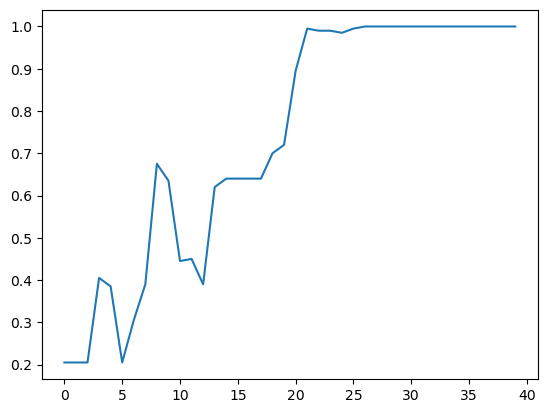

In [15]:
plot(res_hist_test)
plt.show()

In [16]:
# Prepare weights and biases

W = np.array(Srs.w).reshape(N_v+N_c, N_h)*beta_parameter
Wvh=W[:N_v,:]
Wch=W[N_v:,:]
mBv = np.array(Sbv.w)*beta_parameter*tau_rec*bias_input_rate
mBh = np.array(Sbh.w)*beta_parameter*tau_rec*bias_input_rate
b_c = mBv[N_v:(N_v+N_c)]
b_v = mBv[:N_v]
b_h = mBh
mB = np.concatenate([mBv,mBh])

In [17]:
# Save the weights and biases

save_matrices(W, Wvh, Wch, mBv, mBh, b_c, b_v, b_h, mB, date_str, date_time_str)

Matrices saved to output/output/2023-04-28/18-04
